# 📊 Healthcare AI GDPR Compliance – Data Preparation Notebook

_This notebook performs initial data loading, cleaning, feature engineering, and exploratory analysis for GDPR compliance auditing._


In [5]:
# 📌 Import required libraries

import pandas as pd      # Data manipulation and analysis
import matplotlib.pyplot as plt  # Basic plotting and visualization
import seaborn as sns    # Advanced statistical visualizations


In [6]:
# 📌 Load the healthcare logs CSV

# Define file path
file_path = '../data/healthcare_logs.csv'

# Load data into DataFrame
df = pd.read_csv(file_path)

# Preview first rows
df.head()


,UserID,Timestamp,DiagnosisCode,Country,ConsentStatus
0,U001,2024-01-01T12:00:00Z,C50.9,DE,True
1,U002,2024-01-02T14:00:00Z,C50.9,US,False
2,U003,2024-01-03T16:00:00Z,C50.9,DE,True


In [7]:
# 📌 Quick data overview

# Check for null values
print("Null values per column:")
print(df.isnull().sum())

# Check data types
print("\nData types:")
print(df.dtypes)

# Basic statistics
print("\nBasic description:")
print(df.describe(include='all'))


Null values per column:
UserID           0
Timestamp        0
DiagnosisCode    0
Country          0
ConsentStatus    0
dtype: int64

Data types:
UserID           object
Timestamp        object
DiagnosisCode    object
Country          object
ConsentStatus      bool
dtype: object

Basic description:
       UserID             Timestamp DiagnosisCode Country ConsentStatus
count       3                     3             3       3             3
unique      3                     3             1       2             2
top      U001  2024-01-01T12:00:00Z         C50.9      DE          True
freq        1                     1             3       2             2


In [8]:
# 📌 Feature Engineering: EU vs Non-EU Classification

# Define simple EU country list (example)
eu_countries = ['DE', 'FR', 'ES', 'IT', 'NL']

# Create new column
df['Is_EU'] = df['Country'].apply(lambda x: x in eu_countries)

# Preview result
df[['Country', 'Is_EU']].head()


,Country,Is_EU
0,DE,True
1,US,False
2,DE,True


In [9]:
# 📌 Analyze Consent Status Distribution

# Count consent status
print("Consent Status Counts:")
print(df['ConsentStatus'].value_counts())

# Group by EU/Non-EU
print("\nConsent by EU/Non-EU classification:")
print(df.groupby('Is_EU')['ConsentStatus'].value_counts())


Consent Status Counts:
ConsentStatus
True     2
False    1
Name: count, dtype: int64

Consent by EU/Non-EU classification:
Is_EU  ConsentStatus
False  False            1
True   True             2
Name: count, dtype: int64


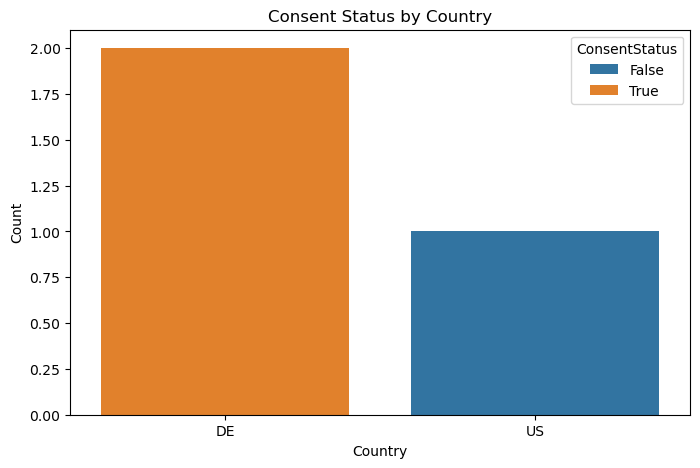

In [10]:
# 📌 Visualize Consent Status by Country

plt.figure(figsize=(8,5))
sns.countplot(x='Country', hue='ConsentStatus', data=df)
plt.title('Consent Status by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.legend(title='ConsentStatus')
plt.show()
